# Topics

## 1. Quick PCA review: The difference between 

### pca.fit() 
### pca.transform()
### pca.fit_transform()

## 2. Support Vector Machine (SVM)

## 3. SVM Applied to Handwritten Digit Recognition

## SVC: Support Vector Classification
## In sklearn.svm.SVC() the default kernel is RBF
## For kernel parameters, see
## http://scikit-learn.org/stable/modules/svm.html#svm-classification

In [1]:
%matplotlib inline

''' Initial Imports'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ***use seaborn plotting style defaults
import seaborn as sns; sns.set()

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


#********************* KEY IMPORT OF THIS LECTURE********************************
from sklearn import svm


# loading handwritten digits
dig_data = load_digits()
X = dig_data.data
# y: the values of the digits, or "ground truth"
y = dig_data.target
dig_img = dig_data.images
print(type(X), X.dtype, X.shape)
print(type(dig_img), dig_img.dtype, dig_img.shape)
print(type(y), y.dtype, y.shape)


<class 'numpy.ndarray'> float64 (1797, 64)
<class 'numpy.ndarray'> float64 (1797, 8, 8)
<class 'numpy.ndarray'> int64 (1797,)


## Notice the usage of zorder in plt.scatter() below 

## you can also use it in plt.plot()

Here are the support vectors: [[ 0.1  0.9]
 [ 1.   2. ]]


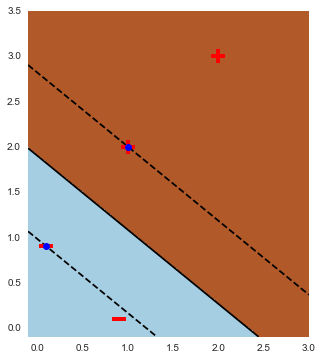

In [2]:
"""

Simple linear example.  Based on code by 

# Code source: Gaël Varoquaux
# License: BSD 3 clause

with significant modification.

This cell is heavily annotated with comments to facilitate your learning
-- please study carefully...and ask me questions if anything is unclear!


[Below I provide two examples of more sophisticaed python coding -- 
it's not required, but if you are interested:

1. numpy.c_ and numpy.r_
http://docs.scipy.org/doc/numpy-1.8.1/reference/generated/numpy.c_.html
http://stackoverflow.com/questions/18601001/numpy-r-is-not-a-function-what-is-it

In particular:
"[np.c_] is in reality not a function, but a class instance of RClass, which has __getindex__ 
implemented, so that you can use it as r_[1]. The cosmetic difference is that you use square 
brackets instead of curved ones, so you are not doing a function call, but you are actually 
indexing the object."]

2. numpy.mgrid

It's a similar idea:

http://students.mimuw.edu.pl/~pbechler/numpy_doc/reference/generated/numpy.mgrid.html


"""


# If you don't feel comfortable using the following
# then use np.column_stack()
# X = np.c_[(0.1, 0.9),
#           (0.9, 0.1),
#           #-- separating the two groups.
#           (1, 2),
#           (2, 3)].T

# dataset 
X = np.column_stack([(0.1, 0.9),
          (0.9, 0.1),
          #-- separating the two groups.
          (1, 2),
          (2, 3)]).T

# targets (or "ground truth")
# I usually use lowercase y, but lowercase y
# is used below as an axis, so I use captial Y here.
Y = [-1] * 2 + [1] * 2


# fit the model; clf: classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# plot the line, the points
plt.figure(figsize=(10, 6))
# plt.clf()


# zorder = 10 ("high") makes sure that the points are not covered by what's plotted below.
plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', \
            s = 200, lw = 4, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', \
            s = 200, lw = 4, zorder = 10)

SV = clf.support_vectors_
print("Here are the support vectors:", SV)
plt.scatter(SV[:, 0], SV[:, 1], \
            marker = '.', c = 'b', s = 100, lw = 2, zorder = 100)

x_min = -0.1
x_max = 3
y_min = -0.1
y_max = 3.5

# A more sophisticated way (see docsting)
# XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
x = np.linspace(x_min, x_max, 200)
y = np.linspace(y_min, y_max, 200)
XX, YY = np.meshgrid(x, y)

# The .flatten() method flattens a 2D array into a 1D array.
# To restore the original 2D shape, one can use the .reshape() method.
Z = clf.decision_function(np.column_stack([XX.flatten(), YY.flatten()]))

# Put the result into a color plot
Z = Z.reshape(XX.shape)

# classification map -- a binary array:
# class_map = 0 for the -ve region, and
# class_map = 1 for the +ve region.
class_map = Z > 0

# because the grid of XX and YY are not integers, 
# one has to explicitly specify the size of the image.
plt.imshow(class_map, cmap= plt.cm.Paired, 
           extent=[x_min, x_max, y_min, y_max], origin='lower')

plt.grid('off')

# Instead of imshow(), you can also do the following:
# plt.pcolormesh(XX, YY, classmap, cmap= plt.cm.Paired)

# color levels: 
# 0: meridian; -1: lower boundary; +1: upper boundary.
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

# Setting limits for x and y axes.
plt.axis((x_min, x_max, y_min, y_max))
plt.show()


## Now let's explore the documentation for SVC 

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## and the attributes:

- ### support\_ : array-like, shape = [n\_SV]
Indices of support vectors.


- ### support\_vectors\_ : array-like, shape = [n_SV, n_features]
Support vectors.

- ### n\_support\_ : array-like, dtype=int32, shape = [n_class]
Number of support vectors for each class.

- ### dual\_coef\_ : array, shape = [n_class-1, n_SV]
dual\_coef\_ : array, shape = [n_class-1, n_SV]
Coefficients of the support vector in the decision function. For multiclass, coefficient for all 1-vs-1 classifiers. The layout of the coefficients in the multiclass case is somewhat non-trivial. See the section about multi-class classification in the SVM section of the User Guide for details.

    --> These can be converted to the Langrange multipliers (i.e., the weights; except here, with labels mixed in)
    
- ### intercept_ : array, shape = [n_class * (n_class-1) / 2]
Constants in decision function.  

    --> That is, the b! 

In [9]:
'''
As you can see only two vectors are at the edge.

I should also construct the w (the decision vector) out of the 
the data points and the Langrange's multipliers, and plot it on 
the figure above.

I should also come up with another example, where more than two points 
are used as support vectors, and I hope I will see unequal weights.

'''
Y = np.array(Y)
print("Indices of support vectors:", clf.support_)
print('support vectors', clf.support_vectors_)
print('dual_coef_', clf.dual_coef_[0].shape)
#print(Y[clf.support_])
# The following shows the two edge points are equally weighted. 
print("Langrange's multipliers", clf.dual_coef_[0]/Y[clf.support_])
print("'b':", clf.intercept_)

Indices of support vectors: [0 1 2 3]
support vectors [[ 0.1  0.9]
 [ 2.5  1. ]
 [ 2.   3. ]
 [ 0.9  0.1]]
dual_coef_ (4,)
Langrange's multipliers [ 1.  1.  1.  1.]
'b': [-0.00058641]


Here are the support vectors: [[ 0.1  0.9]
 [ 0.9  0.1]
 [ 1.   2. ]
 [ 2.5  0.2]]
Indices of support vectors: [0 1 3 4]
support vectors [[ 0.1  0.9]
 [ 0.9  0.1]
 [ 1.   2. ]
 [ 2.5  0.2]]
dual_coef_ (4,)
Langrange's multipliers [ 0.09994368  1.          0.49284632  0.60709736]
'b': [-1.935116]


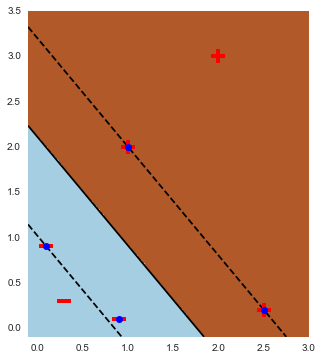

In [4]:
"""

Solution -- 3 points on each side
"""


# If you don't feel comfortable using the following
# then use np.column_stack()
# X = np.c_[(0.1, 0.9),
#           (0.9, 0.1),
#           #-- separating the two groups.
#           (1, 2),
#           (2, 3)].T

# dataset 
X = np.column_stack([(0.1, 0.9),
          (0.9, 0.1), (0.3, 0.3),
          #-- separating the two groups.
          (1, 2),
          (2.5, 0.2),
          (2, 3)]).T

# targets (or "ground truth")
# I usually use lowercase y, but lowercase y
# is used below as an axis, so I use captial Y here.
Y = [-1] * 3 + [1] * 3


# fit the model; clf: classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# plot the line, the points
plt.figure(figsize=(10, 6))
plt.clf()


# zorder = 10 ("high") makes sure that the points are not covered by what's plotted below.
plt.scatter(X[:3, 0], X[:3, 1], marker = '_', c = 'r', \
            s = 200, lw = 4, zorder = 10)
plt.scatter(X[3:, 0], X[3:, 1], marker = '+', c = 'r', \
            s = 200, lw = 4, zorder = 10)

SV = clf.support_vectors_
print("Here are the support vectors:", SV)
plt.scatter(SV[:, 0], SV[:, 1], \
            marker = '.', c = 'b', s = 100, lw = 2, zorder = 100)

x_min = -0.1
x_max = 3
y_min = -0.1
y_max = 3.5

# A more sophisticated way (see docsting)
# XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
x = np.linspace(x_min, x_max, 200)
y = np.linspace(y_min, y_max, 200)
XX, YY = np.meshgrid(x, y)

# The .flatten() method flattens a 2D array into a 1D array.
# To restore the original 2D shape, one can use the .reshape() method.
Z = clf.decision_function(np.column_stack([XX.flatten(), YY.flatten()]))

# Put the result into a color plot
Z = Z.reshape(XX.shape)

# classification map -- a binary array:
# class_map = 0 for the -ve region, and
# class_map = 1 for the +ve region.
class_map = Z > 0

# because the grid of XX and YY are not integers, 
# one has to explicitly specify the size of the image.
plt.imshow(class_map, cmap= plt.cm.Paired, 
           extent=[x_min, x_max, y_min, y_max], origin='lower')

plt.grid('off')

# Instead of imshow(), you can also do the following:
# plt.pcolormesh(XX, YY, classmap, cmap= plt.cm.Paired)

# color levels: 
# 0: meridian; -1: lower boundary; +1: upper boundary.
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

# Setting limits for x and y axes.

Y = np.array(Y)
print("Indices of support vectors:", clf.support_)
print('support vectors', clf.support_vectors_)
print('dual_coef_', clf.dual_coef_[0].shape)
#print(Y[clf.support_])
# The following shows the two edge points are equally weighted. 
print("Langrange's multipliers", clf.dual_coef_[0]/Y[clf.support_])
print("'b':", clf.intercept_)

plt.axis((x_min, x_max, y_min, y_max))
plt.show()



In [5]:
'''
As you can see only two vectors are at the edge.

I should also construct the w (the decision vector) out of the 
the data points and the Langrange's multipliers, and plot it on 
the figure above.

I should also come up with another example, where more than two points 
are used as support vectors, and I hope I will see unequal weights.

'''


"\nAs you can see only two vectors are at the edge.\n\nI should also construct the w (the decision vector) out of the \nthe data points and the Langrange's multipliers, and plot it on \nthe figure above.\n\nI should also come up with another example, where more than two points \nare used as support vectors, and I hope I will see unequal weights.\n\n"



Linear kernel NOT sufficient...




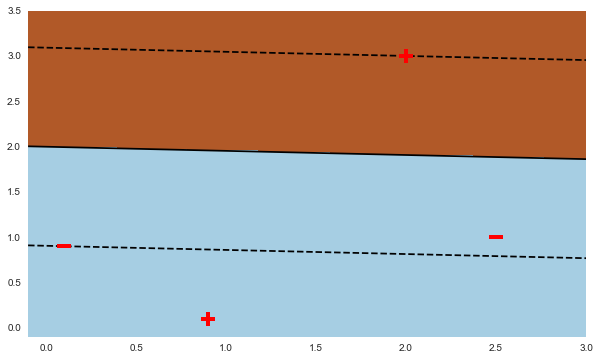

In [6]:
"""

Linear kernel NOT sufficient...

"""
print(__doc__)


# New dataset and targets
X = np.column_stack([(0.1, 0.9),
          (2.5, 1),
          #-- separating the two groups.
          (2, 3),
          (0.9, 0.1)]).T
Y = [-1] * 2 + [1] * 2



plt.figure(figsize=(10, 6))
plt.clf()


plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'k', s = 200, lw = 4, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'k', s = 200, lw = 4, zorder = 10)


# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', s = 200, lw = 4, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', s = 200, lw = 4, zorder = 10)

Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

plt.axis((x_min, x_max, y_min, y_max))


plt.show()




Linear kernel NOT sufficiet...use polynomial kernel.

It eventually worked, but it required a lot of "contortion" 
(i.e., high curvature). 

It turns out it's even better to use the Gaussian kernel (RBF)
-- less contortion (lower curvature).




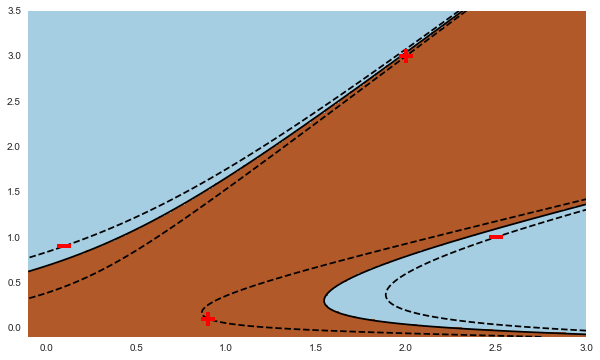

In [7]:
"""

Linear kernel NOT sufficiet...use polynomial kernel.

It eventually worked, but it required a lot of "contortion" 
(i.e., high curvature). 

It turns out it's even better to use the Gaussian kernel (RBF)
-- less contortion (lower curvature).

"""
print(__doc__)


# Same data and targets as above cell.


plt.figure(figsize=(10, 6))
plt.clf()


plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'k', s = 200, lw = 4, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'k', s = 200, lw = 4, zorder = 10)


# fit the model
# degree = 1 is still linear
# clf = svm.SVC(kernel='poly', degree = 1, gamma = 2)  # nonlinear, still not nonlinear enough

# default: degree = 3, gamma = 1
# clf = svm.SVC(kernel='poly', gamma = 2)  # nonlinear, still not nonlinear enough

# Yay!!
clf = svm.SVC(kernel='poly', gamma = 3)  

clf.fit(X, Y)

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', s = 200, lw = 4, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', s = 200, lw = 4, zorder = 10)


Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

plt.axis((x_min, x_max, y_min, y_max))


plt.show()




Linear kernel NOT sufficiet...use polynomial kernel; still not good enough...try rbf

You don't see the "gutter" because you need more than four points.  Feel free to come up
with your own examples.





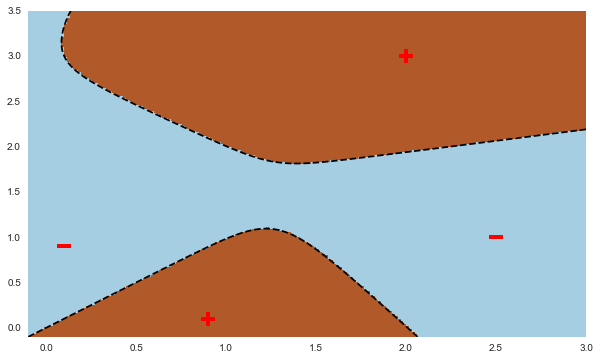

In [8]:
"""

Linear kernel NOT sufficiet...use polynomial kernel; still not good enough...try rbf

You don't see the "gutter" because you need more than four points.  Feel free to come up
with your own examples.


"""
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm



plt.figure(figsize=(10, 6))
plt.clf()

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'k', s = 200, lw = 4, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'k', s = 200, lw = 4, zorder = 10)


# fit the model
clf = svm.SVC(kernel='rbf', gamma=2)
clf.fit(X, Y)

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', s = 200, lw = 4, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', s = 200, lw = 4, zorder = 10)


XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

plt.axis((x_min, x_max, y_min, y_max))


plt.show()


# End of week 14-3
